In [1]:
import pandas as pd 
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [2]:
data = pd.read_csv('../ts_data/example_wp_log_peyton_manning.csv', parse_dates=['ds'])
data 

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [3]:
m = Prophet(interval_width=0.95)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.41    0.00109841       326.358      0.7019      0.7019      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7990.03    0.00870456       663.895      0.4236      0.4236      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7994.7    0.00088867       189.435       2.393      0.2393      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7999.23   0.000490727       311.727       0.255           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     431       8000.37   3.72506e-05       109.303   1.977e-07       0.001      577  LS failed, Hessian reset 
     499       8001.34    0.00358046       233.206           1           1      6

In [4]:
cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days',
                      parallel='processes')

INFO:prophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f80021bad00>


Initial log joint probability = -6.79277
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2213.96    0.00140347       93.5941           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2215.62    0.00106734       88.1999           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Initial log joint probability = -6.89856
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       2215.77   0.000113764       129.622   6.501e-07       0.001      352  LS failed, Hessian reset 
     299       2215.82   1.72032e-06       70.1487      0.2662           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       2215.82   7.03187e-08        81.431      0.3404           1      442   

     320       4123.42   4.80909e-06       49.7557   1.051e-07       0.001      561  LS failed, Hessian reset 
     282       4526.01   0.000128622       86.7652   1.823e-06       0.001      427  LS failed, Hessian reset 
     474       3667.37   5.56631e-05       95.1034   8.069e-07       0.001      810  LS failed, Hessian reset 
     299       4526.03   4.06817e-05       64.0893      0.3577           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3667.38   2.82253e-06       71.6754      0.4296      0.4296      839   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5556.14    0.00488714       177.622           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4124.06   0.000109437         71.53           1           1      670   
    Iter      log prob        ||dx||      |

     599       6982.63   0.000121771       123.658           1           1      899   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     623       6982.66   7.35932e-05        163.32   8.571e-07       0.001      965  LS failed, Hessian reset 
     699       6982.82    0.00109424        86.692      0.7929      0.7929     1072   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     701       6982.83   3.34824e-05       97.3287   3.979e-07       0.001     1115  LS failed, Hessian reset 
     799       6982.97     0.0021446       83.2463           1           1     1237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     802       6982.97   7.11167e-05       80.4808   1.006e-06       0.001     1287  LS failed, Hessian reset 
     897       6983.04   4.67197e-07       53.5489           1           1     1411   
Optimization terminated normally: 
  Conver

In [5]:
cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.956828,8.259395,9.775501,8.242493,2010-02-15
1,2010-02-17,8.723230,7.948808,9.489480,8.008033,2010-02-15
2,2010-02-18,8.607021,7.757262,9.401421,8.045268,2010-02-15
3,2010-02-19,8.528870,7.719982,9.283700,7.928766,2010-02-15
4,2010-02-20,8.270872,7.493479,9.012294,7.745003,2010-02-15
...,...,...,...,...,...,...
3983,2016-01-16,8.570513,7.456978,9.723347,7.817223,2015-01-20
3984,2016-01-17,8.965138,7.823264,10.086026,9.273878,2015-01-20
3985,2016-01-18,9.271196,8.054544,10.367130,10.333775,2015-01-20
3986,2016-01-19,9.054283,7.976406,10.216871,9.125871,2015-01-20


In [6]:
perf = performance_metrics(cv)
perf

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.494800,0.703420,0.505277,0.058540,0.050149,0.058848,0.838968
1,38 days,0.500706,0.707606,0.510301,0.059120,0.049955,0.059490,0.835313
2,39 days,0.522967,0.723165,0.516433,0.059724,0.050078,0.060219,0.835085
3,40 days,0.530259,0.728189,0.519331,0.060033,0.049706,0.060598,0.837597
4,41 days,0.537736,0.733305,0.520341,0.060114,0.049955,0.060742,0.840110
...,...,...,...,...,...,...,...,...
324,361 days,1.124243,1.060303,0.858688,0.102924,0.086611,0.102100,0.693239
325,362 days,1.139703,1.067569,0.865362,0.103531,0.087550,0.102659,0.688214
326,363 days,1.161086,1.077537,0.872890,0.104296,0.087700,0.103299,0.684102
327,364 days,1.177457,1.085107,0.880544,0.105229,0.089266,0.104047,0.677478


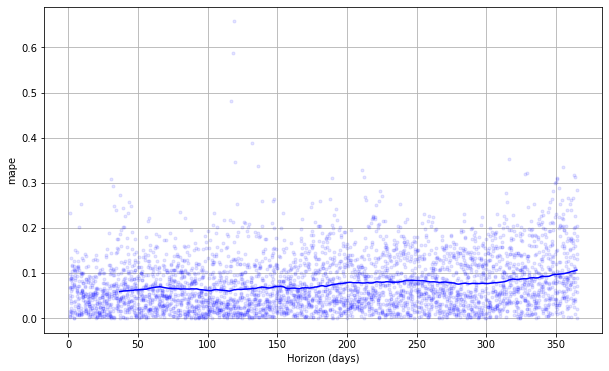

In [7]:
plot_cross_validation_metric(cv, metric='mape');